# 1. CNN 사용 실습

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__() # nn.Module의 다양한 변수를 상속받기 위함
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=5, stride=1)
    self.conv2 = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=5, stride=1)
    self.fc1 = nn.Linear(10 * 12 * 12, 50)
    self.fc2 = nn.Linear(50, 10)
  
  def forward(self, x):
    print("연산 전", x.size())
    x = F.relu(self.conv1(x))
    print("conv1 연산 후", x.size())
    x = F.relu(self.conv2(x))
    print("conv2 연산 후",x.size())
    x = x.view(-1, 10 * 12 * 12)
    print("차원 감소 후", x.size())
    x = F.relu(self.fc1(x))
    print("fc1 연산 후", x.size())
    x = self.fc2(x)
    print("fc2 연산 후", x.size())
    return x

cnn = CNN()
output = cnn(torch.randn(10, 1, 20, 20))  # Input Size: (10, 1, 20, 20)

연산 전 torch.Size([10, 1, 20, 20])
conv1 연산 후 torch.Size([10, 3, 16, 16])
conv2 연산 후 torch.Size([10, 10, 12, 12])
차원 감소 후 torch.Size([10, 1440])
fc1 연산 후 torch.Size([10, 50])
fc2 연산 후 torch.Size([10, 10])


In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Mini_Alex(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(384, 384, 3, 1, 1), # in_channels: 384, out_channels: 384, kernel_size=3x3, stride=1, padding=1
            nn.ReLU() # 13 유지
            # 384x13x13
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(384, 256, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(3, 2) # 13 -> 6
            # 256x6x6
        )
        
        self.fc1 = nn.Linear(256 * 6 * 6, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 1000)

    def forward(self, x): # input size = 384x13x13
        print('연산 전:', x.size())
        out = self.conv1(x)
        print('conv1 block 후 결과:', out.size())
        out = self.conv2(out) 
        print('conv2 block 후 결과:', out.size())
        out = out.view(out.size(0), -1) 
        print('차원 감소 후 결과:', out.size())
        
        out = F.relu(self.fc1(out))
        print('fc1 연산 후 결과:', out.size())
        out = F.relu(self.fc2(out))
        print('fc2 연산 후 결과:', out.size())
        out = self.fc3(out)
        out = F.log_softmax(out, dim=1)
        print('fc3 연산 후 결과:', out.size())
        
        return out

alex = Mini_Alex()
output = alex(torch.randn(10, 384, 13, 13))  # Input Size: (10, 384, 13, 13)
print('\n최종 출력 결과:', output.size())

연산 전: torch.Size([10, 384, 13, 13])
conv1 block 후 결과: torch.Size([10, 384, 13, 13])
conv2 block 후 결과: torch.Size([10, 256, 6, 6])
차원 감소 후 결과: torch.Size([10, 9216])
fc1 연산 후 결과: torch.Size([10, 4096])
fc2 연산 후 결과: torch.Size([10, 4096])
fc3 연산 후 결과: torch.Size([10, 1000])

최종 출력 결과: torch.Size([10, 1000])


# 2. LSTM 사용 실습

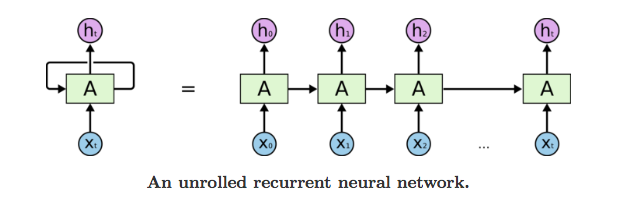

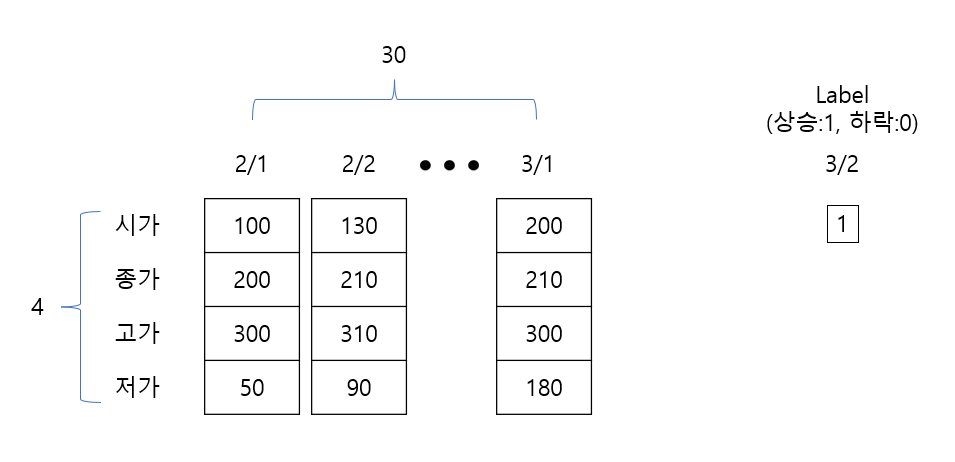

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class LSTM1(nn.Module):
  def __init__(self):
    super().__init__() 
    self.lstm = nn.LSTM(input_size=4, 
                        hidden_size=64, 
                        bidirectional=False, 
                        batch_first=True
                        )
    self.sigmoid = torch.nn.Sigmoid()
    self.fc = nn.Linear(64*1, 1) # (hidden_size * bidirectional(True->2), 원하는 ouput크기)


  def forward(self, x):
    h_0 = torch.zeros(1*1, 32, 64) # (bidirectional(True->2)*num_layer, batch, hidden_size)
    c_0 = torch.zeros(1*1, 32, 64)

    print("연산 전", x.size())
    out, (h, c) = self.lstm(x, (h_0, c_0))
    print("최종층 출력",out.shape)
    o = out[:,-1,:]
    print("마지막 hidden unit 출력", o.shape)
    o = self.sigmoid(self.fc(o))

    return o


lstm = LSTM1()
output = lstm(torch.randn(32, 30, 4))  # Input Size: (32, 30, 4)
print(output)

연산 전 torch.Size([32, 30, 4])
최종층 출력 torch.Size([32, 30, 64])
마지막 hidden unit 출력 torch.Size([32, 64])
tensor([[0.5324],
        [0.5293],
        [0.5235],
        [0.5289],
        [0.5246],
        [0.5299],
        [0.5350],
        [0.5281],
        [0.5335],
        [0.5247],
        [0.5268],
        [0.5262],
        [0.5259],
        [0.5296],
        [0.5332],
        [0.5306],
        [0.5348],
        [0.5189],
        [0.5244],
        [0.5282],
        [0.5381],
        [0.5325],
        [0.5231],
        [0.5335],
        [0.5346],
        [0.5318],
        [0.5440],
        [0.5116],
        [0.5401],
        [0.5216],
        [0.5274],
        [0.5262]], grad_fn=<SigmoidBackward0>)


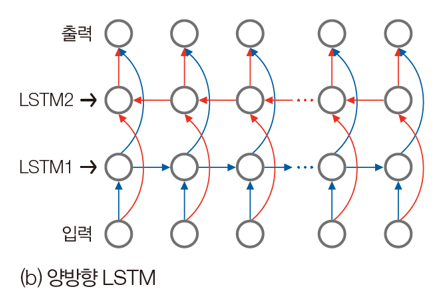

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class LSTM1(nn.Module):
  def __init__(self):
    super().__init__() 
    self.lstm = nn.LSTM(input_size=4, 
                        hidden_size=64, 
                        bidirectional=True, 
                        batch_first=True
                        )
    self.sigmoid = torch.nn.Sigmoid()
    self.fc = nn.Linear(64*2, 1)


  def forward(self, x):
    h_0 = torch.zeros(2*1, 32, 64)
    c_0 = torch.zeros(2*1, 32, 64)

    print("연산 전", x.size())
    out, (h, c) = self.lstm(x, (h_0, c_0))
    print("최종층 출력",out.shape)
    o1 = out[:, -1, :64] # 순방향 마지막 출력
    print("합치기 전 o1", o1.shape)
    o2 = out[:, 0, 64:] # 역방향 마지막 출력
    print("합치기 전 o2", o2.shape)
    o = torch.concat((o1, o2), dim=1)
    print("합친 결과", o.shape)
    o = self.sigmoid(self.fc(o))

    return o


lstm = LSTM1()
output = lstm(torch.randn(32, 30, 4))  # Input Size: (32, 30, 4)
print(output)

연산 전 torch.Size([32, 30, 4])
최종층 출력 torch.Size([32, 30, 128])
합치기 전 o1 torch.Size([32, 64])
합치기 전 o2 torch.Size([32, 64])
합친 결과 torch.Size([32, 128])
tensor([[0.5039],
        [0.4995],
        [0.5097],
        [0.5096],
        [0.5072],
        [0.5030],
        [0.5121],
        [0.5172],
        [0.5137],
        [0.5042],
        [0.5132],
        [0.5022],
        [0.5127],
        [0.5078],
        [0.5070],
        [0.5020],
        [0.5151],
        [0.5099],
        [0.5124],
        [0.5017],
        [0.5057],
        [0.5068],
        [0.5089],
        [0.5131],
        [0.5074],
        [0.5045],
        [0.5074],
        [0.5076],
        [0.5105],
        [0.5214],
        [0.5058],
        [0.5066]], grad_fn=<SigmoidBackward0>)
